# Some ipython magic to make life a bit easier

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Basic imports, more importantly here is to look in "Shine_Dalgarno_library" to make sure you have the required imports

In [5]:
import Shine_Dalgarno_library
import json

# These are the basic files depending on which organism/dataset you want to analyze

In [11]:
#For all datasets, same aSD seq in the 5' direction
asd_extensions_5_prime = ['-UGGAUCACCUCC.txt', '-GGAUCACCUCC.txt', '-GAUCACCUCC.txt',\
           '-AUCACCUCC.txt','-UCACCUCC.txt','-CACCUCC.txt','-ACCUCC.txt', '-CCUCC.txt']


#For C. crescentus
teff_file = '../Data/Ccrescentus_rich_teff_cov=75_len=90_ignore=0.json'
mfe_file = '../Data/caulobacter_mfe.json'
genome_file = '../Data/Genomes/NA1000_JMS.gbk'
asd_extensions_3_prime = ['-CCUCC.txt', '-CCUCCU.txt', '-CCUCCUU.txt', '-CCUCCUUU.txt',\
           '-CCUCCUUUC.txt', '-CCUCCUUUCU.txt', '-CCUCCUUUCUA.txt', '-CCUCCUUUCUAA.txt', '-CCUCCUUUCUAAG.txt']
asd_extensions_varied = ['-GAUCACCUCCUUU.txt', '-AUCACCUCCUUU.txt', '-UCACCUCCUUU.txt', '-CACCUCCUUU.txt', '-ACCUCCUUU.txt', '-CCUCCUUU.txt',\
           '-GAUCACCUCCUUUC.txt', '-AUCACCUCCUUUC.txt', '-UCACCUCCUUUC.txt', '-CACCUCCUUUC.txt', '-ACCUCCUUUC.txt', '-CCUCCUUUC.txt',\
           '-GAUCACCUCCUUUCU.txt', '-AUCACCUCCUUUCU.txt', '-UCACCUCCUUUCU.txt', '-CACCUCCUUUCU.txt', '-ACCUCCUUUCU.txt', '-CCUCCUUUCU.txt',\
           '-GAUCACCUCCUUUCUA.txt', '-AUCACCUCCUUUCUA.txt', '-UCACCUCCUUUCUA.txt', '-CACCUCCUUUCUA.txt', '-ACCUCCUUUCUA.txt', '-CCUCCUUUCUA.txt']

#For E. coli datasets
# teff_file = '../Data/Ecoli_rich_teff_cov=75_len=90_ignore=0.json'
# teff_file = '../Data/Buskirk1_teff.json'
# teff_file = '../Data/Buskirk2_teff.json'
# mfe_file = '../Data/escherichia_mfe.json'
# genome_file = '../Data/Genomes/oldEcoli.gb'
# asd_extensions_3_prime = ['-CCUCC.txt', '-CCUCCU.txt', '-CCUCCUU.txt', '-CCUCCUUU.txt',\
#            '-CCUCCUUUC.txt', '-CCUCCUUUCU.txt', '-CCUCCUUUCUA.txt', '-CCUCCUUUCUAA.txt', '-CCUCCUUUCUAAG.txt']#For C. crescentus
# asd_extensions_varied = ['-GAUCACCUCCUUA.txt', '-AUCACCUCCUUA.txt', '-UCACCUCCUUA.txt', '-CACCUCCUUA.txt', '-ACCUCCUUA.txt','-CCUCCUUA.txt',\
#            '-GAUCACCUCCUUAC.txt', '-AUCACCUCCUUAC.txt',  '-UCACCUCCUUAC.txt', '-CACCUCCUUAC.txt', '-ACCUCCUUAC.txt','-CCUCCUUAC.txt']

#For B. subtilis
# teff_file = '../Data/Bsubtilis_rich_teff_cov=75_len=90_ignore=0.json'
# mfe_file = '../Data/bacillus_mfe.json'
# genome_file = '../Data/Genomes/bacillus.gb'
# asd_extensions_3_prime = ['-CCUCC.txt', '-CCUCCU.txt', '-CCUCCUU.txt', '-CCUCCUUU.txt',\
#            '-CCUCCUUUC.txt', '-CCUCCUUUCU.txt', '-CCUCCUUUCUA.txt', '-CCUCCUUUCUAA.txt', '-CCUCCUUUCUAAG.txt']#For C. crescentus
# asd_extensions_varied = ['-GAUCACCUCCUUU.txt', '-AUCACCUCCUUU.txt', '-UCACCUCCUUU.txt', '-CACCUCCUUU.txt', '-ACCUCCUUU.txt', '-CCUCCUUU.txt',\
#            '-GAUCACCUCCUUUC.txt', '-AUCACCUCCUUUC.txt', '-UCACCUCCUUUC.txt', '-CACCUCCUUUC.txt', '-ACCUCCUUUC.txt', '-CCUCCUUUC.txt',\
#            '-GAUCACCUCCUUUCU.txt', '-AUCACCUCCUUUCU.txt', '-UCACCUCCUUUCU.txt', '-CACCUCCUUUCU.txt', '-ACCUCCUUUCU.txt', '-CCUCCUUUCU.txt',\
#            '-GAUCACCUCCUUUCUA.txt', '-AUCACCUCCUUUCUA.txt', '-UCACCUCCUUUCUA.txt', '-CACCUCCUUUCUA.txt', '-ACCUCCUUUCUA.txt', '-CCUCCUUUCUA.txt']

# From the files above, get the basic dictionaries of gene sequence, 5' UTR, translation efficiency, folding energy, etc.

In [12]:
seq_dict, five_prime_seq_dict, three_prime_seq_dict = Shine_Dalgarno_library.get_seq_dicts(genome_file)

with open(teff_file) as infile:
    trans_eff_dict = json.load(infile)
print("Number of genes with teff data:", len(trans_eff_dict.keys()))

with open(mfe_file) as infile:
    mfe_dict = json.load(infile)
print("Number of genes with mfe data:", len(mfe_dict.keys()))


to_delete = []
for gene in trans_eff_dict:
    if gene not in seq_dict:
        to_delete.append(gene)
for gene in to_delete:
    del trans_eff_dict[gene]
print("Number of genes with teff data (after some processing):", len(trans_eff_dict.keys()))


trans_eff_dict_log = {}
for i in trans_eff_dict.keys():
    trans_eff_dict_log[i] = trans_eff_dict[i]

Number of genes with teff data: 1833
Number of genes with mfe data: 3885
Number of genes with teff data (after some processing): 1833


# Correct the translation efficiency measurements by regressing against folding energy

0.0583026260288 0.538681944352 0.320946534572 3.47205133615e-45 0.00402073877715 *** 0.103006678054
8.50626894817e-18 1.72570605688e-16 4.944120869e-17 1.0 0.00402073877715


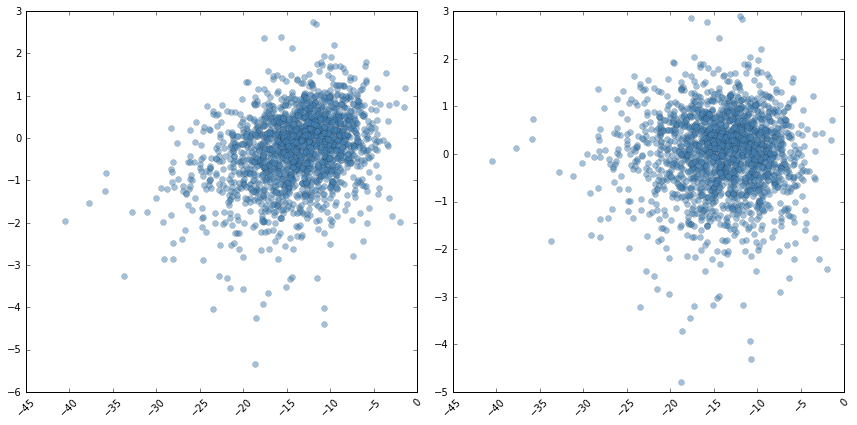

In [13]:
trans_eff_dict_structure = Shine_Dalgarno_library.teff_given_structure(trans_eff_dict, mfe_dict)

# Brief aside here, cis-mRNA folding energies and aSD hybridization energies are calculated with Vienna-RNA but provided as .json dictionaries. Should you like to re-calculate them, this is the code that I used to do so (requires having commandline vienna rna functioning, see Shine_Dalgarno_library.py for details) but is unnecessary 

# For a given aSD seq, calculate 1st and 3rd order polynomial fits for a variety of spacings relative to the start codon

In [ ]:
energy_base = '../Data/energy_dictionaries/json-energyRef-'
asd_of_interest = 'UCACCUCCUUUCU' 
ending = '.txt'
energy_file = energy_base + asd_of_interest + ending

spacing_list = list(range(1, 15))
Shine_Dalgarno_library.compare_first_and_third_degree(trans_eff_dict_structure,\
                                                      five_prime_seq_dict,\
                                                      seq_dict,\
                                                      energy_file,\
                                                      spacing_list)


# Plot 1st and 3rd order fits for a single spacing

In [ ]:
energy_base = '../Data/energy_dictionaries/json-energyRef-'
asd_of_interest = 'ACCUCCUUA'

ending = '.txt'
energy_file = energy_base + asd_of_interest + ending

spacing = -3

poly_1_model, poly_3_model, percent_increase, df = Shine_Dalgarno_library.plot_individual(trans_eff_dict_structure,\
                                                        five_prime_seq_dict, seq_dict, energy_file, spacing)



# Compare the various 3' aSD extensions in the form of a heat map
### This and following are only showing 3rd order polynomial fits

In [ ]:
spacing_list = list(range(1, 15))
energy_file_list = []
for i in asd_extensions_3_prime:
    for energy_file in glob.glob('../Data/energy_dictionaries/json-energyRef*.txt'):
        if i in energy_file:
            energy_file_list.append(energy_file)

Shine_Dalgarno_library.compare_different_asds(trans_eff_dict_log, five_prime_seq_dict, seq_dict, energy_file_list,\
                                              spacing_list)

# Compare the various 5' aSD extensions in the form of a heat map

In [ ]:
spacing_list = list(range(1, 15))
energy_file_list = []
for i in asd_extensions_5_prime:
    for energy_file in glob.glob('../Data/energy_dictionaries/json-energyRef*.txt'):
        if i in energy_file:
            energy_file_list.append(energy_file)

Shine_Dalgarno_library.compare_different_asds(trans_eff_dict_structure, five_prime_seq_dict, seq_dict, energy_file_list,\
                                              spacing_list)

# Compare some combinations of 5' and 3' extensions in the form of a heat map

In [ ]:
spacing_list = list(range(1, 15))
energy_file_list = []
for i in asd_extensions_varied:
    for energy_file in glob.glob('../Data/energy_dictionaries/json-energyRef*.txt'):
        if i in energy_file:
            energy_file_list.append(energy_file)

Shine_Dalgarno_library.compare_different_asds(trans_eff_dict_structure, five_prime_seq_dict, seq_dict, energy_file_list,\
                                              spacing_list)

# Scratch, Ignore below here for now

In [ ]:
teff_file_list = ['./teff_all.json', './teff_80.json', './teff_60.json', './teff_40.json', './teff_20.json']

genome_file = '../../RibosomeProfiling/Data/oldEcoli.gb'
organism_name = 'Escherichia_taniguchi'

seq_dict, five_prime_seq_dict, three_prime_seq_dict = Shine_Dalgarno_library.get_seq_dicts(genome_file)

first_order_r2 = []
third_order_r2 = []
percent_increase_list = []

for teff_file in teff_file_list:
    organism_name = 'Escherichia_taniguchi'+teff_file.split('/')[-1].strip('.json').strip('teff')

    with open(teff_file) as infile:
        trans_eff_dict = json.load(infile)
    print(len(trans_eff_dict.keys()))

    to_delete = []
    for gene in trans_eff_dict:
        if gene not in seq_dict:
            to_delete.append(gene)
    for gene in to_delete:
        del trans_eff_dict[gene]
    mfeDict = Shine_Dalgarno_library.get_structure(seq_dict, five_prime_seq_dict, trans_eff_dict)
    trans_eff_dict_structure = Shine_Dalgarno_library.teff_given_structure(trans_eff_dict, mfeDict, organism_name, save_file=False)    
    
    
    energy_base = '/home/visitors/hockenberry/Projects/TransInteractions/Data/json-energyRef-'
    asd_of_interest = 'ACCUCCUUA'
    ending = '.txt'
    energy_file = energy_base + asd_of_interest + ending


    flexibility = 0
    spacing = -5


    temp_1, temp_3, percent_increase = Shine_Dalgarno_library.plot_individual(trans_eff_dict_structure, five_prime_seq_dict, seq_dict, energy_file, spacing, flexibility,\
                                           save_file=True, organism=organism_name)
    first_order_r2.append(temp_1.rsquared_adj)
    third_order_r2.append(temp_3.rsquared_adj)
    percent_increase_list.append(percent_increase)

In [ ]:
print(first_order_r2)
print(third_order_r2)
print(percent_increase_list)

In [ ]:
x_labels = ['', 'All data\n (n=1014)', 'Top 80\%\n(n=811)', 'Top 60\%\n(n=611)', 'Top 40\%\n(n=407)', 'Top 20\%\n(n=204)']
Shine_Dalgarno_library.plot_taniguchi_data(first_order_r2, third_order_r2, percent_increase_list, x_labels, save_file=False)

# Kosuri data plot

In [ ]:
df = pd.read_excel('../Data/kosuri_data.xls')

In [ ]:
seq_dicty = {}
exp_dicty = {}
for i in range(111):
    seq_dicty[df.loc[i]['RBS'].strip('\"')] = str(df.loc[i]['Sequence']).strip('\"').replace(' ', '')[:-3].replace('T', 'U')
    exp_dicty[df.loc[i]['RBS'].strip('\"')] = np.log2(df.loc[i]['mean.xlat'])

try:
    del seq_dicty['DeadRBS']
except KeyError:
    pass


In [ ]:
energy_file = '/home/visitors/hockenberry/Projects/TransInteractions/Data/json-energyRef-ACCUCCUUA.txt'
with open(energy_file) as infile:
    energy_dict = json.load(infile)
    
asd_seq = energy_file.split('-')[-1].strip('.txt')
print(asd_seq)
spacing = -5
gene_binding_dict = {}

for i in seq_dicty.keys():
    gene_binding_dict[i] = energy_dict[seq_dicty[i][spacing-len(asd_seq):spacing]]
#     gene_binding_dict[i] = min([energy_dict[seq_dicty[i][-14:-5]], energy_dict[seq_dicty[i][-15:-6]], energy_dict[seq_dicty[i][-13:-4]]])


with open('../Data/kosuri_teffs.json', 'w') as outfile:
    json.dump(exp_dicty, outfile)
with open('../Data/kosuri_binding_energies.json', 'w') as outfile:
    json.dump(gene_binding_dict, outfile)

In [ ]:
Shine_Dalgarno_library.plot_individual_kosuri(exp_dicty, gene_binding_dict, asd_seq, spacing)

In [ ]:
# # # with open('../../RibosomeProfiling/Data/operonDict20nt.json') as infile:
# # #     operonDict = json.load(infile)

# df = pd.read_csv('/home/visitors/hockenberry/Desktop/ccrescentus_DOOR_operons.csv', sep='\t', index_col='id')
# df = pd.read_csv('/home/visitors/hockenberry/Desktop/bsub_DOOR_operons.csv', sep='\t', index_col='id')
df = pd.read_csv('/home/visitors/hockenberry/Desktop/ecoli_DOOR_operons.csv', sep='\t', index_col='id')
operonDict = {}
for index in df.index:
    for number, synonym in enumerate(df.loc[index]['synonyms'].split(';')):
        if synonym.strip() in operonDict.keys():
            operonDict[synonym.strip()] = 'ambiguous'
        elif number == 0:
            operonDict[synonym.strip()] = 'First'
        else:
            operonDict[synonym.strip()] = 'Late'
            
print(len(operonDict.keys()))
print(set(operonDict.values()))            

for gene in list(trans_eff_dict.keys()):
    if gene not in operonDict.keys():
        del trans_eff_dict[gene]
#     elif operonDict[gene] != 'First':
    elif operonDict[gene] != 'Late':
        del trans_eff_dict[gene]
print(len(trans_eff_dict.keys()))

# organism_name = organism_name + 'first_in_TU'
organism_name = organism_name + 'middle_of_TU'

In [ ]:
mers_11 = []
mers_12 = []
mers_13 = []
trash, fivePrime, trash = Shine_Dalgarno_library.get_seq_dicts(genome_file)

In [ ]:
for i in range(1):
    print(i)

In [ ]:
for gene in fivePrime.keys():
    tempSeq = fivePrime[gene][15:].replace('T', 'U')
    for event in range(len(tempSeq)-11):
        mers_11.append(tempSeq[event:event+11])
    for event in range(len(tempSeq)-12):
        mers_12.append(tempSeq[event:event+12])
    for event in range(len(tempSeq)-13):
        mers_13.append(tempSeq[event:event+13])
mers_11 = list(set(mers_11))
mers_12 = list(set(mers_12))
mers_13 = list(set(mers_13))

In [ ]:
print(len(mers_11), len(mers_12), len(mers_13))

In [ ]:
import json
with open('../Data/11mers_bs.json', 'w') as outfile:
    json.dump(mers_11, outfile)
with open('../Data/12mers_bs.json', 'w') as outfile:
    json.dump(mers_12, outfile)
with open('../Data/13mers_bs.json', 'w') as outfile:
    json.dump(mers_13, outfile)
    

In [ ]:
np.exp(-0.4)

In [ ]:
# genome_file = '../../RibosomeProfiling/Data/NA1000_JMS.gbk'
# genome_file = '../../RibosomeProfiling/Data/oldEcoli.gb'
genome_file = '../../RibosomeProfiling/Data/bacillus.gb'


mers_14 = []
mers_15 = []
trash, fivePrime, trash = Shine_Dalgarno_library.get_seq_dicts(genome_file)
for gene in fivePrime.keys():
    tempSeq = fivePrime[gene][15:].replace('T', 'U')
    for event in range(len(tempSeq)-14):
        mers_14.append(tempSeq[event:event+14])
    for event in range(len(tempSeq)-15):
        mers_15.append(tempSeq[event:event+15])

mers_14 = list(set(mers_14))
mers_15 = list(set(mers_15))
print(len(mers_14), len(mers_15))
import json
with open('../Data/14mers_bs.json', 'w') as outfile:
    json.dump(mers_14, outfile)
with open('../Data/15mers_bs.json', 'w') as outfile:
    json.dump(mers_15, outfile)